# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [8]:
x = np.arange(0,100)
y = x*2
z = x**2


#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

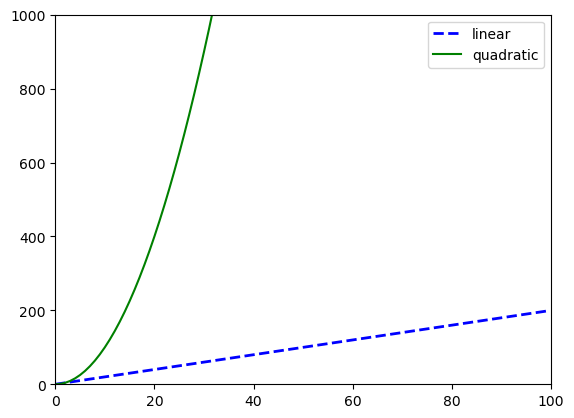

In [11]:
# Method 1
plt.plot(x,y,"b--",label='linear',linewidth=2.0)
plt.plot(x,z, "g",label='quadratic')
plt.xlim(0,100)
plt.ylim(0,1000)
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

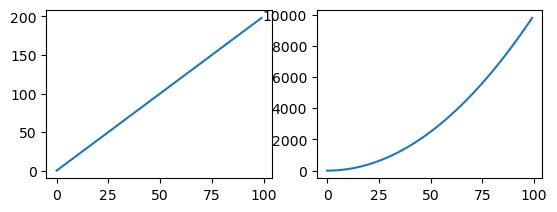

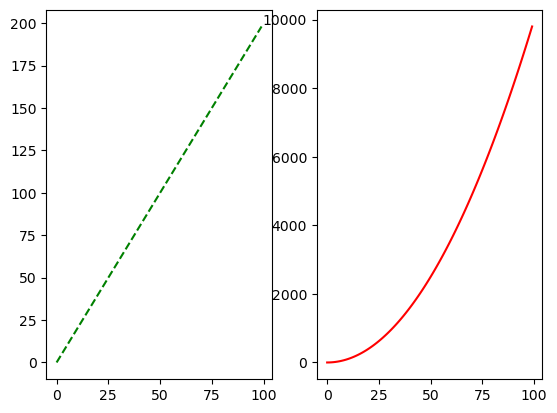

In [12]:
# Method 2
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.plot(x, z)

#OR

plot_options, (plot_1, plot_2) = plt.subplots(nrows=1, ncols=2)
plot_1.plot(x,y, "g--")
plot_2.plot(x,z, "r")
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 1.0, 'X&Z')

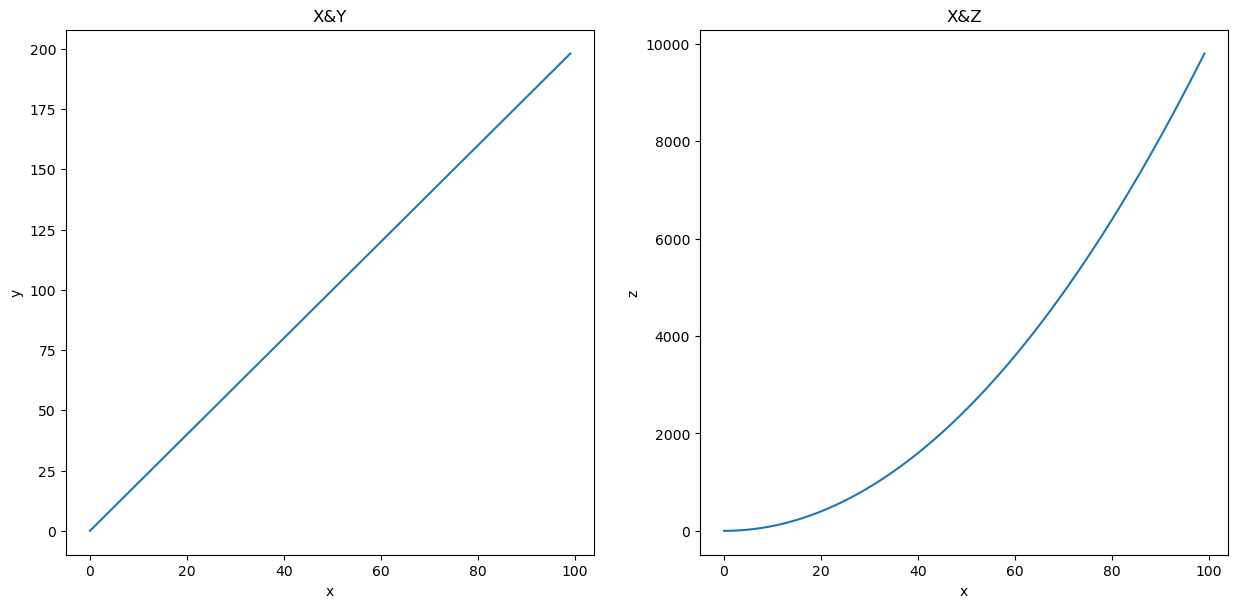

In [16]:
# your code here

fig, axs = plt.subplots(1, 1, figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.ylabel("y")
plt.xlabel("x")
plt.title("X&Y")

plt.subplot(2, 2, 2)
plt.plot(x, z)
plt.ylabel("z")
plt.xlabel("x")
plt.title("X&Z")

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

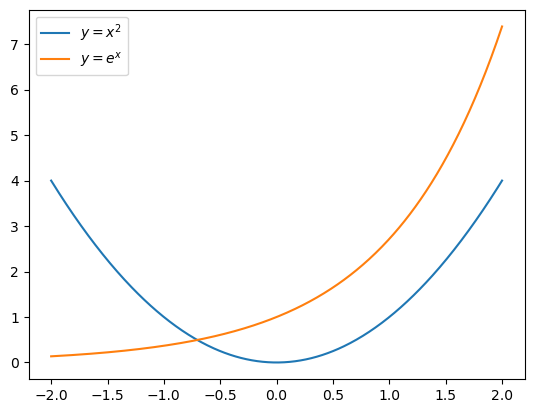

In [13]:
# your code here

x = np.linspace(-2, 2, 500)
y1 = x**2
y2 = np.exp(x)

plt.plot(x, y1, label=r'$y=x^2$')
plt.plot(x, y2, label=r'$y=e^x$')

plt.legend(loc='best')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

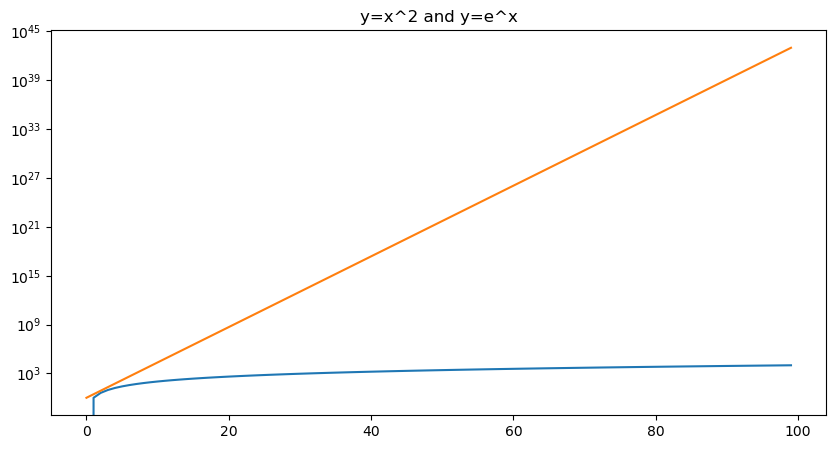

In [27]:
# your code here
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_yscale('log')
ax.set_title('y=x^2 and y=e^x')

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [15]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

([<matplotlib.axis.XTick at 0x19fc05f94f0>,
 [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

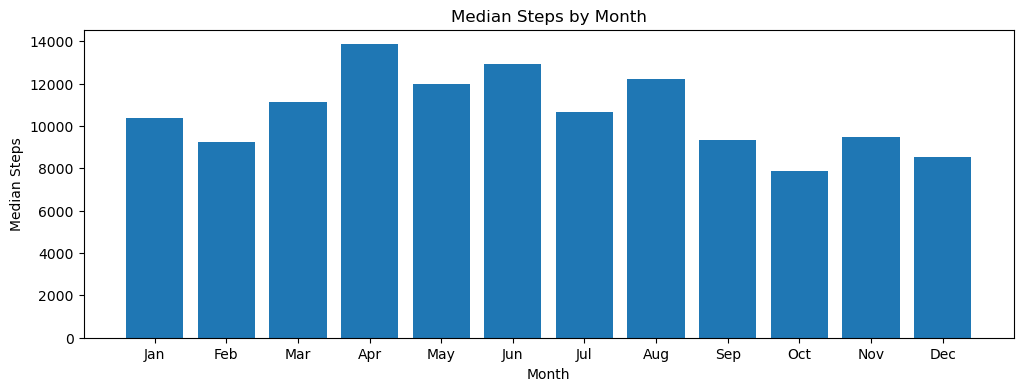

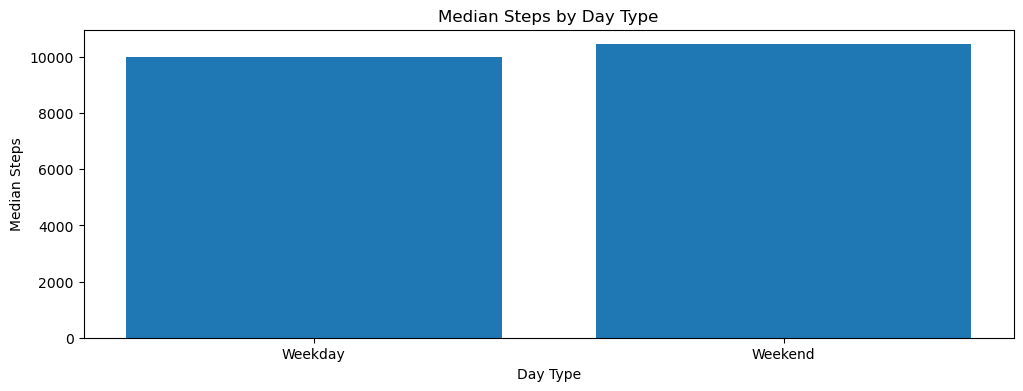

In [16]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_by_month = fitbit.groupby(by='Months_encoded').median()['Steps']


fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(steps_by_month.index, steps_by_month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Month')
plt.xticks(steps_by_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# MEDIAN STEPS BY WORK_OR_WEEKEND
steps_by_day = fitbit.groupby(by='Work_or_Weekend').median()['Steps']

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(steps_by_day.index, steps_by_day.values)
ax.set_xlabel('Day Type')
ax.set_ylabel('Median Steps')
ax.set_title('Median Steps by Day Type')
plt.xticks(steps_by_day.index, ['Weekday', 'Weekend'])
# your code here

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

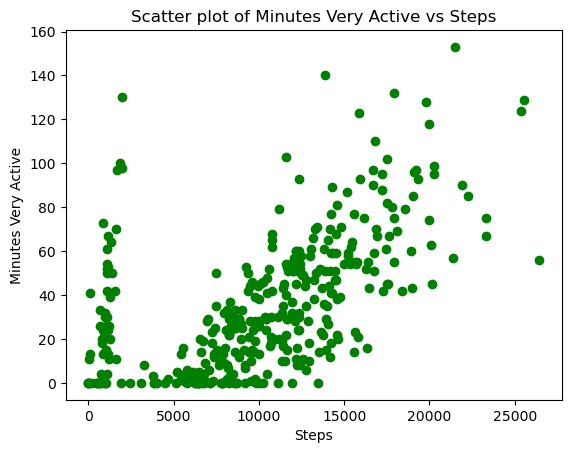

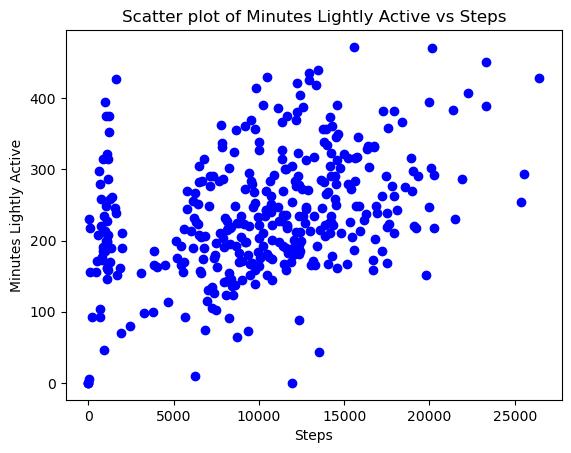

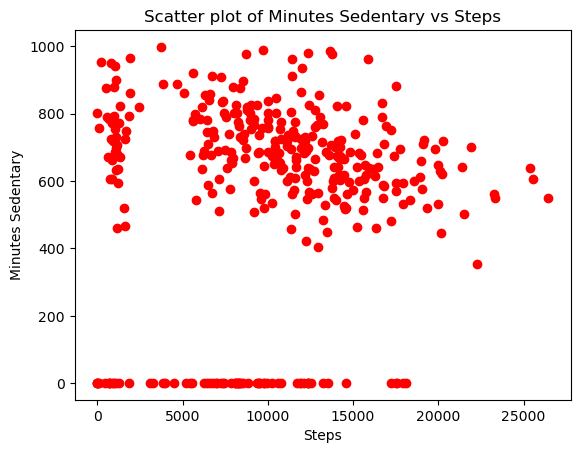

In [17]:
# your code here
activeness = ["Minutes Very Active", "Minutes Lightly Active", "Minutes Sedentary"]
colors = ["green", "blue", "red"]

for i,level in enumerate(activeness):
    plt.scatter(fitbit["Steps"], fitbit[level], color = colors[i])
    plt.ylabel(level)
    plt.xlabel("Steps")
    plt.title("Scatter plot of {} vs Steps".format(level))
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [19]:
# your code here

titanic = pd.read_csv("titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [20]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
# NUMERICAL VARIABLES
# your code here
numeric = titanic.select_dtypes(exclude = object)
numeric.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
# CATEGORICAL VARIABLES
# your code here

categorical = titanic.select_dtypes(include = "object")
categorical.columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

[]

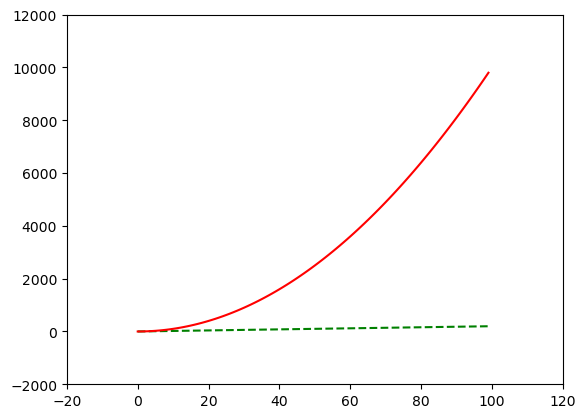

In [23]:
# your code here
x = np.arange(0,100)
y = x*2
z = x**2
plt.plot(x,y,"g--",label='linear')
plt.plot(x,z, "r",label='quadratic')
plt.style.use("classic")
plt.plot(figsize = (12,6))


#### Use the right visulalization to show the distribution of column `Age`.

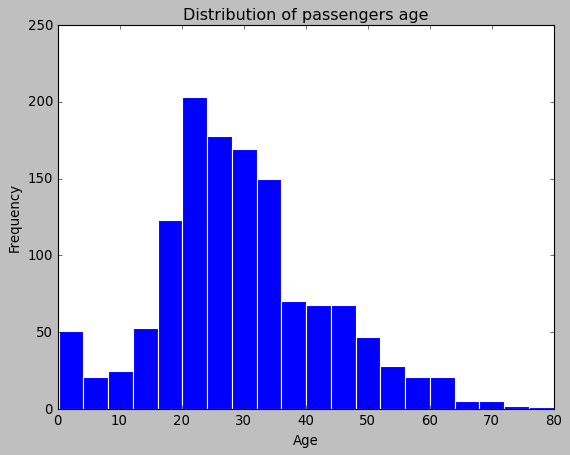

In [24]:
# your code here
plt.hist(titanic["Age"], bins=20, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of passengers age')

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

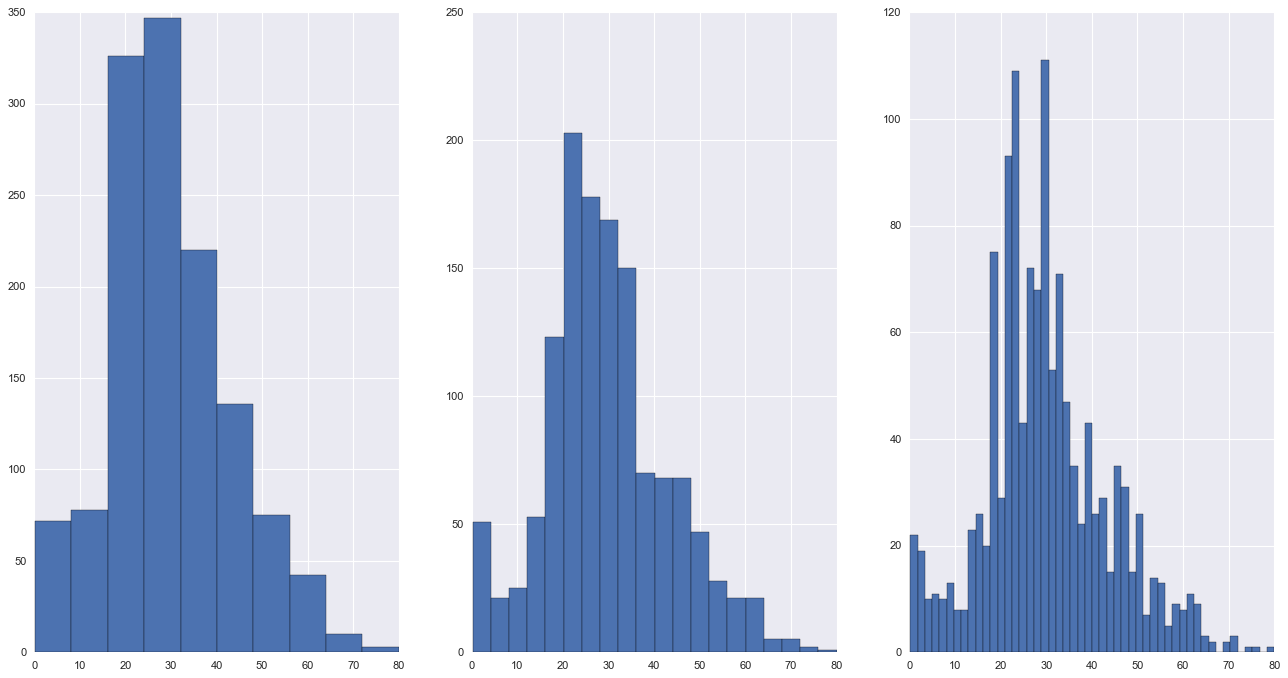

In [25]:
# your code here

plt.style.use("seaborn")
plot_options, (plot_1, plot_2, plot_3) = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

plot_1.hist(titanic["Age"], bins = 10)
plot_2.hist(titanic["Age"], bins = 20)
plot_3.hist(titanic["Age"], bins = 50)

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

If the number of bins increases, the more detailed the data is
"""

#### Use seaborn to show the distribution of column `Age`.

C:\Users\biggu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


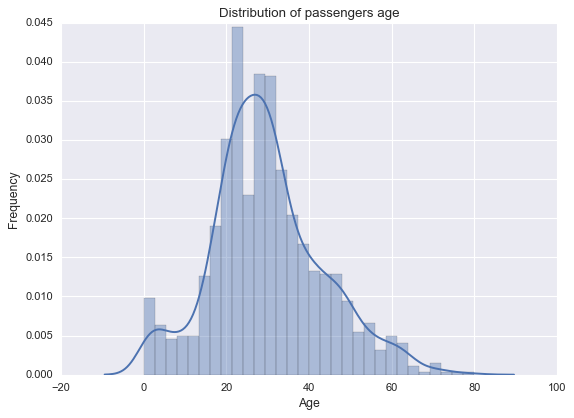

In [26]:
# your code here

import seaborn as sns

sns.distplot(titanic["Age"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of passengers age')
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

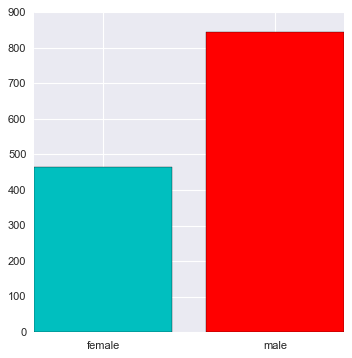

In [27]:
# Method 1 - matplotlib
# your code here

gender = titanic.groupby("Gender").agg({"PassengerId":"count"}).reset_index()
plt.figure(figsize = (5,5))
plt.bar(color = ["c","r"], x = gender["Gender"], height = gender["PassengerId"] )
plt.show()


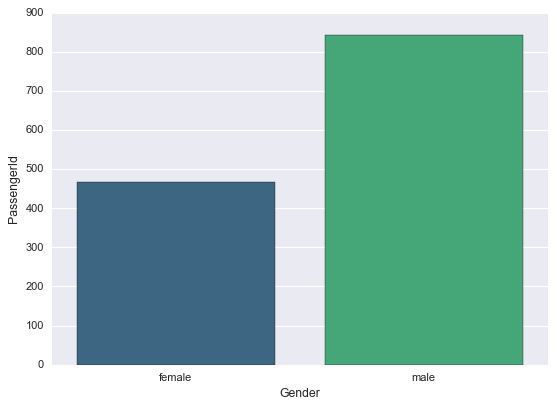

In [28]:
# Method 2 - seaborn
# your code here

gender = titanic.groupby("Gender").agg({"PassengerId":"count"}).reset_index()

sns.barplot(x = gender["Gender"], y = gender["PassengerId"], palette ='viridis')

plt.show()

#### Use the right plot to visualize the column `Pclass`.

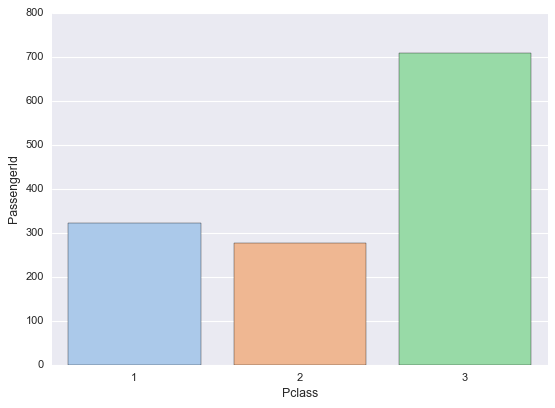

In [29]:
# your code here

pcalss = titanic.groupby("Pclass").agg({"PassengerId":"count"}).reset_index()

sns.barplot(x = pcalss["Pclass"], y = pcalss["PassengerId"], palette ='pastel')

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

C:\Users\biggu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


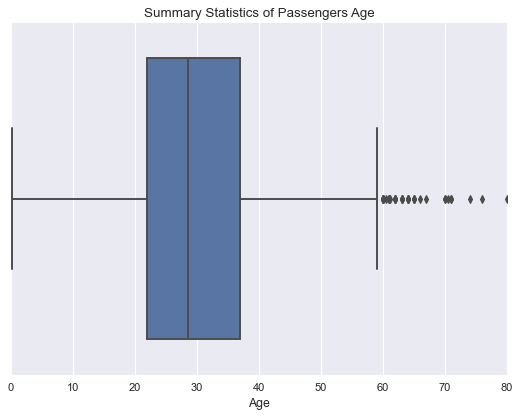

In [30]:
# your code here


sns.boxplot(titanic["Age"])
plt.title('Summary Statistics of Passengers Age')

plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

Most passengers had between 20 and 40 years. The most common age was 28 years old
We have some outliers, which represents the elderly with ages over 60 years old
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

C:\Users\biggu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


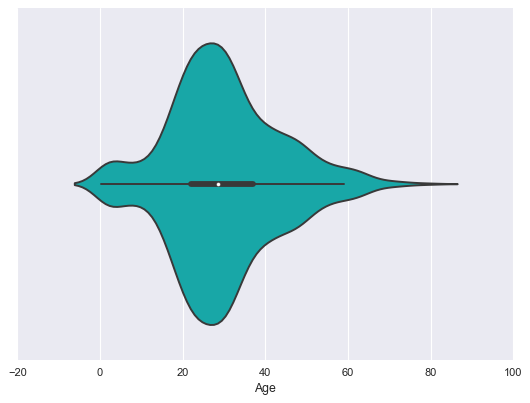

In [31]:
# your code here
sns.violinplot(titanic["Age"], color="c")
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [32]:
"""
your comments here

The violin plot above, comprises the representation of the summary statistics present in a boxplot, 
plus the distribution of Age - allowing for a visual representation of the density at each point 
along the range of the x axis.
"""

'\nyour comments here\n\nThe violin plot above, comprises the representation of the summary statistics present in a boxplot, \nplus the distribution of Age - allowing for a visual representation of the density at each point \nalong the range of the x axis.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

<function matplotlib.pyplot.show(close=None, block=None)>

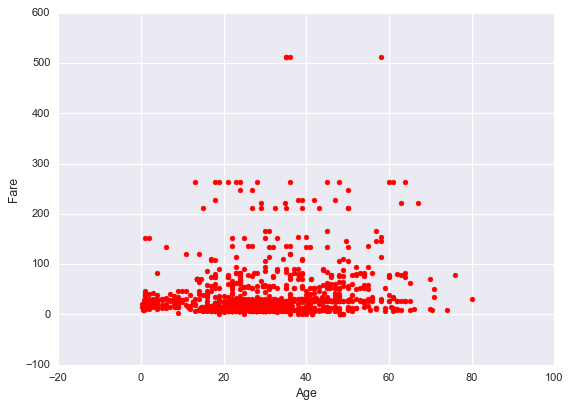

In [33]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic["Age"],titanic["Fare"], color = "red")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show

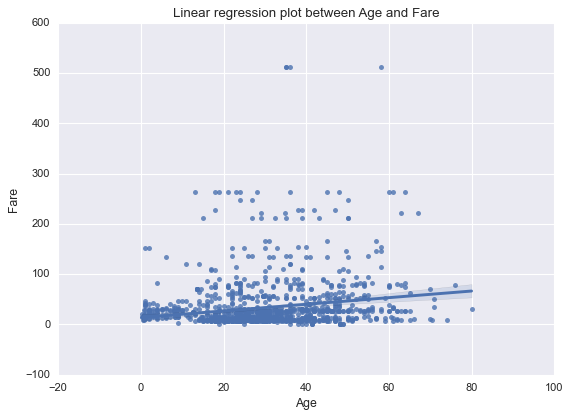

In [34]:
# Method 2 - seaborn
# your code here

sns.regplot(data=titanic, x="Age", y="Fare")
plt.title("Linear regression plot between Age and Fare")
plt.show()

#### Plot the correlation matrix using seaborn.

C:\Users\biggu\AppData\Local\Temp\ipykernel_19532\4262714544.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))


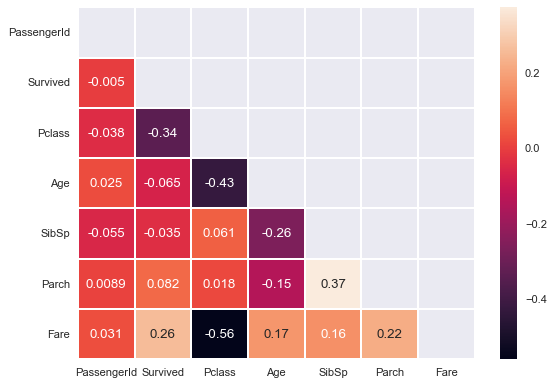

In [35]:
# your code here

corr=titanic.corr()

mask=np.triu(np.ones_like(corr, dtype=np.bool))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr, mask=mask, linewidths=1.5, annot=True)

plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here
the more correlated features are Pclass and Fare, and Plcass and Age.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

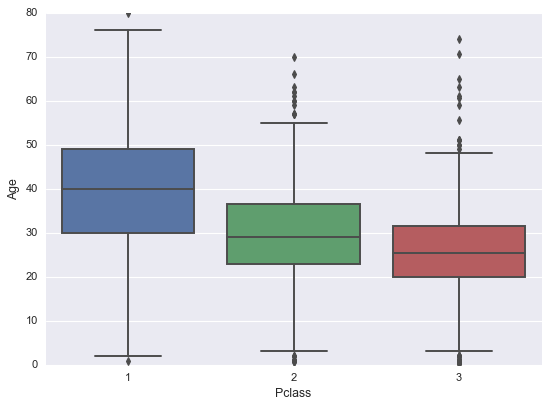

In [36]:
# your code here


sns.boxplot(x = titanic["Pclass"], y = titanic["Age"])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

C:\Users\biggu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\biggu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


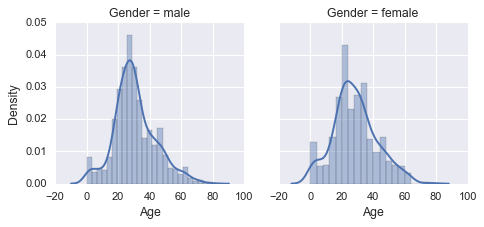

In [37]:
# your code here

gender = sns.FacetGrid(titanic, col="Gender")

gender.map(sns.distplot,"Age")
gender.add_legend()
plt.show()